In [5]:
import pandas as pd
import scanpy as sc


 download blood dataset from https://figshare.com/ndownloader/files/50850792 to Trajectories/Ageing/Ageing_human/input_data/50850792

In [ ]:
blood = sc.read_h5ad("Trajectories/Ageing/Ageing_human/input_data/50850792")

In [6]:
# Матрица экспрессии (клетки × гены)
blood_exp = pd.DataFrame(blood.X.toarray(), columns=blood.var_names, index=blood.obs_names)
print(blood_exp.head())

# Метаданные клеток
blood_obs = blood.obs
print(blood_obs.head())

index                                         TSPAN6  TNMD  DPM1  SCYL3  \
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_G15     0.0   0.0   0.0    0.0   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_L11     0.0   0.0   0.0    0.0   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_J16     0.0   0.0   0.0    0.0   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_F5      0.0   0.0   0.0    0.0   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_N22     0.0   0.0   0.0    0.0   

index                                         C1orf112  FGR  CFH  FUCA2  GCLC  \
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_G15       0.0  0.0  0.0    0.0   0.0   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_L11       0.0  0.0  0.0    0.0   0.0   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_J16       0.0  0.0  0.0    0.0   0.0   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_F5        0.0  0.0  0.0    0.0   0.0   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_N22       0.0  0.0  0.0    0.0   0.0   

index                                         NFYA  ...  ENSG0

In [7]:
blood_obs.cell_ontology_class.unique()

['monocyte', 'mature nk t cell', 'platelet', 'plasma cell', 'cd4-positive, alpha-beta t cell', ..., 'macrophage', 'intermediate monocyte', 'plasmacytoid dendritic cell', 'basophil', 'common myeloid progenitor']
Length: 22
Categories (22, object): ['b cell', 'basophil', 'cd4-positive, alpha-beta t cell', 'cd8-positive, alpha-beta t cell', ..., 'plasma cell', 'plasmacytoid dendritic cell', 'platelet', 'regulatory t cell']

In [8]:
blood_exp["cell_type"] = blood_obs.cell_ontology_class

In [9]:
cell_counts = blood_exp["cell_type"].value_counts()
print(cell_counts)

cell_type
neutrophil                                              32198
erythrocyte                                             11548
classical monocyte                                      10591
monocyte                                                 9602
cd4-positive, alpha-beta t cell                          4900
cd8-positive, alpha-beta t cell                          4572
b cell                                                   3893
natural killer cell                                      3057
macrophage                                               1228
intermediate monocyte                                    1036
plasma cell                                               816
naive thymus-derived cd4-positive, alpha-beta t cell      490
platelet                                                  438
non-classical monocyte                                    353
mature nk t cell                                          202
hematopoietic precursor cell                              13

In [10]:
neutrophil_data = blood_exp[blood_exp["cell_type"] == "neutrophil"]

In [12]:
patients_metadata = blood_obs 

# Выводим первые 5 строк
print(patients_metadata.age)

TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_G15        61
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_L11        61
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_J16        61
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_F5         61
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_N22        61
                                                    ..
TSP10_Blood_NA_10X_1_1_Enriched_TTTGGAGGTCGGTGTC    33
TSP10_Blood_NA_10X_1_1_Enriched_TTTGGTTAGTACTGGG    33
TSP10_Blood_NA_10X_1_1_Enriched_TTTGTTGAGGGAGGTG    33
TSP10_Blood_NA_10X_1_1_Enriched_TTTGTTGTCCAAGCCG    33
TSP10_Blood_NA_10X_1_1_Enriched_TTTGTTGTCCGCGATG    33
Name: age, Length: 85233, dtype: int32


In [ ]:
autof = pd.read_csv("signatures/output_data_signatures/autophagy_signatures.csv")

In [14]:
autof["Biological Function"]

0      mTOR regulators
1      mTOR regulators
2      mTOR regulators
3      mTOR regulators
4      mTOR regulators
            ...       
772              Other
773              Other
774              Other
775              Other
776              Other
Name: Biological Function, Length: 777, dtype: object

In [15]:
autof["Gene"].unique()

array(['LAMTOR1', 'LAMTOR2', 'LAMTOR3', 'LAMTOR4', 'LAMTOR5', 'FLCN',
       'FNIP1', 'FNIP2', 'MIOS', 'SEH1L', 'WDR24', 'WDR59', 'SEC13',
       'RHEB', 'NPC1', 'SLC38A9', 'NPC2', 'BTRC', 'SESN2', 'SESN1',
       'SESN3', 'PPP2CA', 'RRAGA', 'RRAGC', 'RRAGD', 'RRAGB', 'TSC2',
       'TSC1', 'NPRL2', 'NPRL3', 'DEPDC5', 'KPTN', 'ITFG2', 'SZT2',
       'CASTOR1', 'CASTOR2', 'LGALS8', 'ATP6V0E1', 'ATP6V1D', 'ATP6V1G3',
       'ATP6V1C2', 'ATP6V1B2', 'ATP6V0A1', 'ATP6V1B1', 'ATP6V1G2',
       'ATP6V1E2', 'ATP6V0A4', 'ATP6V1E1', 'ATP6V0B', 'TCIRG1', 'ATP6AP2',
       'ATP6V1A', 'ATP6AP1', 'ATP6V1G1', 'ATP6V0E2', 'ATP6V0C', 'ATP6V1H',
       'ATP6V0A2', 'ATP6V1C1', 'ATP6V1F', 'ATP6V0D1', 'MTOR', 'DEPTOR',
       'RPTOR', 'AKT1S1', 'MLST8', 'RICTOR', 'PRR5', 'MAPKAP1', 'TELO2',
       'TTI1', 'TTI2', 'PRR5L', 'PRKAA1', 'PRKAA2', 'PRKAG1', 'PRKAG2',
       'PRKAG3', 'PRKAB1', 'PRKAB2', 'STK11', 'STRADA', 'STRADB', 'CAB39',
       'CAB39L', 'CAMKK2', 'PIK3CA', 'PIK3CB', 'PIK3CD', 'PIK3CG',
     

In [16]:
from scipy.stats import spearmanr

In [18]:
metb = blood.obs
metb.age
blood_exp["age"] = metb.age


In [19]:
metb.age.unique()

array([61, 59, 69, 60, 45, 56, 33], dtype=int32)

In [20]:
results = []
for gene in autof["Gene"]:
    if gene not in blood_exp.columns:
        continue
    # Проверка на наличие достаточного количества точек
    if len(blood_exp[gene].dropna()) < 3:
        print(f"Пропущен {gene}: недостаточно данных")
        continue
    
    # Расчет коэффициента Спирмена и p-value
    rho, pval = spearmanr(blood_exp['age'], blood_exp[gene])
    
    # Определение типа тренда
    trend = "none"
    if pval < 0.05:
        trend = "up" if rho > 0 else "down"
    
    results.append({
        'gene': gene,
        'spearman_rho': rho,
        'p_value': pval,
        'trend': trend
    })


In [21]:
# Сохранение результатов в DataFrame
results_df = pd.DataFrame(results)
print(results_df)

         gene  spearman_rho        p_value trend
0     LAMTOR1     -0.009386   6.140593e-03  down
1     LAMTOR2      0.037158   1.958289e-27    up
2     LAMTOR3     -0.064088   2.858976e-78  down
3     LAMTOR4     -0.068603   1.946520e-89  down
4     LAMTOR5     -0.077133  1.279703e-112  down
..        ...           ...            ...   ...
771  TP53INP2     -0.069554   6.909929e-92  down
772      TP63      0.014985   1.214797e-05    up
773      TP73      0.012669   2.165921e-04    up
774     TUSC1     -0.008798   1.021138e-02  down
775     VEGFA     -0.016376   1.743800e-06  down

[776 rows x 4 columns]


In [22]:
blood_aut = blood_exp[results_df.gene]

In [23]:
blood_aut

index,LAMTOR1,LAMTOR2,LAMTOR3,LAMTOR4,LAMTOR5,FLCN,FNIP1,FNIP2,MIOS,SEH1L,...,SERPINA1,SPHK1,SPNS1,ST13,TNFSF10,TP53INP2,TP63,TP73,TUSC1,VEGFA
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_G15,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.694067,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_L11,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_J16,2.290174,0.000000,2.445518,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,2.777956,0.000000,0.0,0.000000,0.000000,0.0,0.000000
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_F5,1.954906,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.566637,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_N22,2.937275,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.000000,0.960999,0.004709,2.114427,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP10_Blood_NA_10X_1_1_Enriched_TTTGGAGGTCGGTGTC,0.777673,0.000000,0.000000,1.016897,0.0,0.0,0.00000,1.209797,0.777673,0.0,...,0.777673,0.000000,0.000000,0.462602,0.462602,0.0,0.000000,0.000000,0.0,0.000000
TSP10_Blood_NA_10X_1_1_Enriched_TTTGGTTAGTACTGGG,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.68578,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.088777,0.000000,0.0,0.000000,0.000000,0.0,0.000000
TSP10_Blood_NA_10X_1_1_Enriched_TTTGTTGAGGGAGGTG,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.596132,1.087536,0.0,1.087536
TSP10_Blood_NA_10X_1_1_Enriched_TTTGTTGTCCAAGCCG,0.000000,0.000000,0.000000,0.771962,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.202377,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [24]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# 1. Копируем данные, чтобы не изменять оригинальный DataFrame
zscore_data = blood_aut.copy()



# 3. Применяем Z-score нормализацию по каждому гену (по колонкам)
zscore_data = zscore_data.apply(zscore, axis=0)

# 4. Проверяем результат
print("Z-score нормализованные данные:")
print(zscore_data.head())



Z-score нормализованные данные:
index                                          LAMTOR1   LAMTOR2   LAMTOR3  \
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_G15 -0.829846 -0.546058 -0.447661   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_L11 -0.829846 -0.546058 -0.447661   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_J16  2.672540 -0.546058  5.528055   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_F5   2.159811 -0.546058 -0.447661   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_N22  3.662158 -0.546058 -0.447661   

index                                          LAMTOR4   LAMTOR5      FLCN  \
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_G15 -1.067722 -0.805639 -0.247868   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_L11 -1.067722 -0.805639 -0.247868   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_J16 -1.067722 -0.805639 -0.247868   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_F5  -1.067722 -0.805639 -0.247868   
TSP2_Blood_NA_SS2_B113459_B133094_LinNeg_N22 -1.067722 -0.805639 -0.247868   

index                         

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
significant_genes = results_df[results_df['p_value'] < 0.05].sort_values('spearman_rho', ascending=False)

In [27]:
# Создаем копию DataFrame для безопасной работы
significant_genes = results_df[results_df['p_value'] < 0.05].copy()

# Добавляем столбец с абсолютным значением коэффициента Спирмена
significant_genes['abs_spearman'] = significant_genes['spearman_rho'].abs()

# Сортируем по абсолютному значению (по убыванию)
significant_genes = significant_genes.sort_values('abs_spearman', ascending=False)

In [28]:
significant_genes

,gene,spearman_rho,p_value,trend,abs_spearman
439,MCL1,-0.423844,0.000000,down,0.423844
759,PTEN,-0.413893,0.000000,down,0.413893
742,NAMPT,-0.397706,0.000000,down,0.397706
146,VMP1,-0.389991,0.000000,down,0.389991
193,WDFY3,-0.389668,0.000000,down,0.389668
...,...,...,...,...,...
736,MAP2K7,0.007063,0.039209,up,0.007063
99,RPS6KB1,0.007023,0.040340,up,0.007023
184,ATG10,0.007018,0.040463,up,0.007018
635,TPP1,-0.006913,0.043557,down,0.006913


In [29]:
significant_genes.p_value
import numpy as np

# Заменить нули на минимальное положительное число для float64
min_p = np.nextafter(0, 1)  # ~5e-324
significant_genes['p_value'] = significant_genes['p_value'].replace(0, min_p)

In [30]:
genes_of_interest= autof["Gene"]

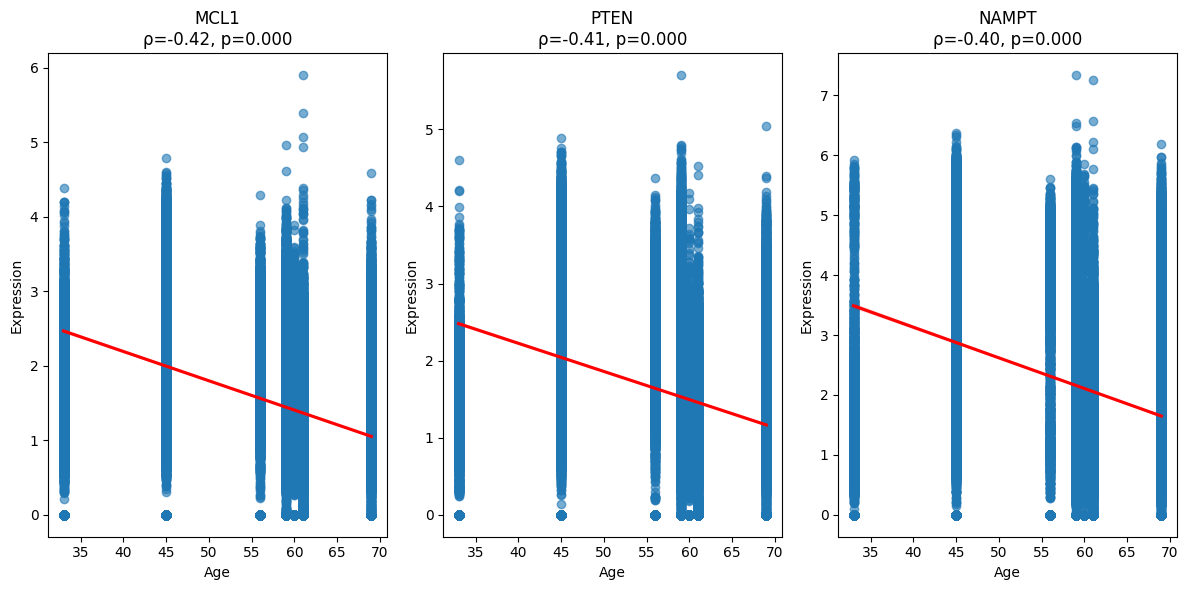

In [31]:
# Выбор генов с значимыми трендами (p < 0.05)
# Создаем копию DataFrame для безопасной работы
significant_genes = results_df[results_df['p_value'] < 0.05].copy()

# Добавляем столбец с абсолютным значением коэффициента Спирмена
significant_genes['abs_spearman'] = significant_genes['spearman_rho'].abs()

# Сортируем по абсолютному значению (по убыванию)
significant_genes = significant_genes.sort_values('abs_spearman', ascending=False)

# Отрисовка графиков
plt.figure(figsize=(12, 6))
for i, (_, row) in enumerate(significant_genes.head(3).iterrows()):
    gene = row['gene']  # Получаем имя гена из строки DataFrame
    plt.subplot(1, 3, i+1)
    
    # Проверка, что ген есть в данных
    if gene not in blood_exp.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    sns.regplot(
        x=blood_exp['age'],  # Используем явно столбец 'age'
        y=blood_exp[gene],   # Используем столбец с именем гена
        scatter_kws={'alpha': 0.6}, 
        line_kws={'color': 'red'}
    )
    plt.title(f"{gene}\nρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}")
    plt.xlabel("Age")
    plt.ylabel("Expression")

plt.tight_layout()
plt.show()

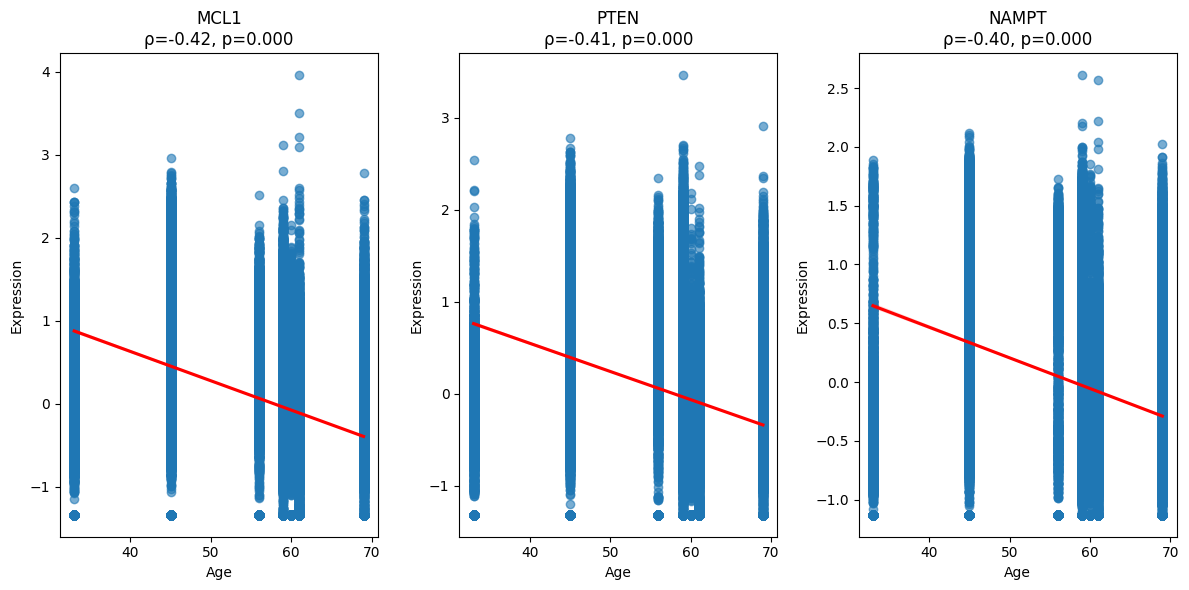

In [32]:
# Выбор генов с значимыми трендами (p < 0.05)
# Создаем копию DataFrame для безопасной работы
significant_genes = results_df[results_df['p_value'] < 0.05].copy()

# Добавляем столбец с абсолютным значением коэффициента Спирмена
significant_genes['abs_spearman'] = significant_genes['spearman_rho'].abs()

# Сортируем по абсолютному значению (по убыванию)
significant_genes = significant_genes.sort_values('abs_spearman', ascending=False)

# Отрисовка графиков
plt.figure(figsize=(12, 6))
for i, (_, row) in enumerate(significant_genes.head(3).iterrows()):
    gene = row['gene']  # Получаем имя гена из строки DataFrame
    plt.subplot(1, 3, i+1)
    
    # Проверка, что ген есть в данных
    if gene not in zscore_data.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    sns.regplot(
        x=blood_exp['age'],  # Используем явно столбец 'age'
        y=zscore_data[gene],   # Используем столбец с именем гена
        scatter_kws={'alpha': 0.6}, 
        line_kws={'color': 'red'}
    )
    plt.title(f"{gene}\nρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}")
    plt.xlabel("Age")
    plt.ylabel("Expression")

plt.tight_layout()
plt.show()

/tmp/ipykernel_490120/3371646317.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=blood_exp,
/tmp/ipykernel_490120/3371646317.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=blood_exp,
/tmp/ipykernel_490120/3371646317.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=blood_exp,


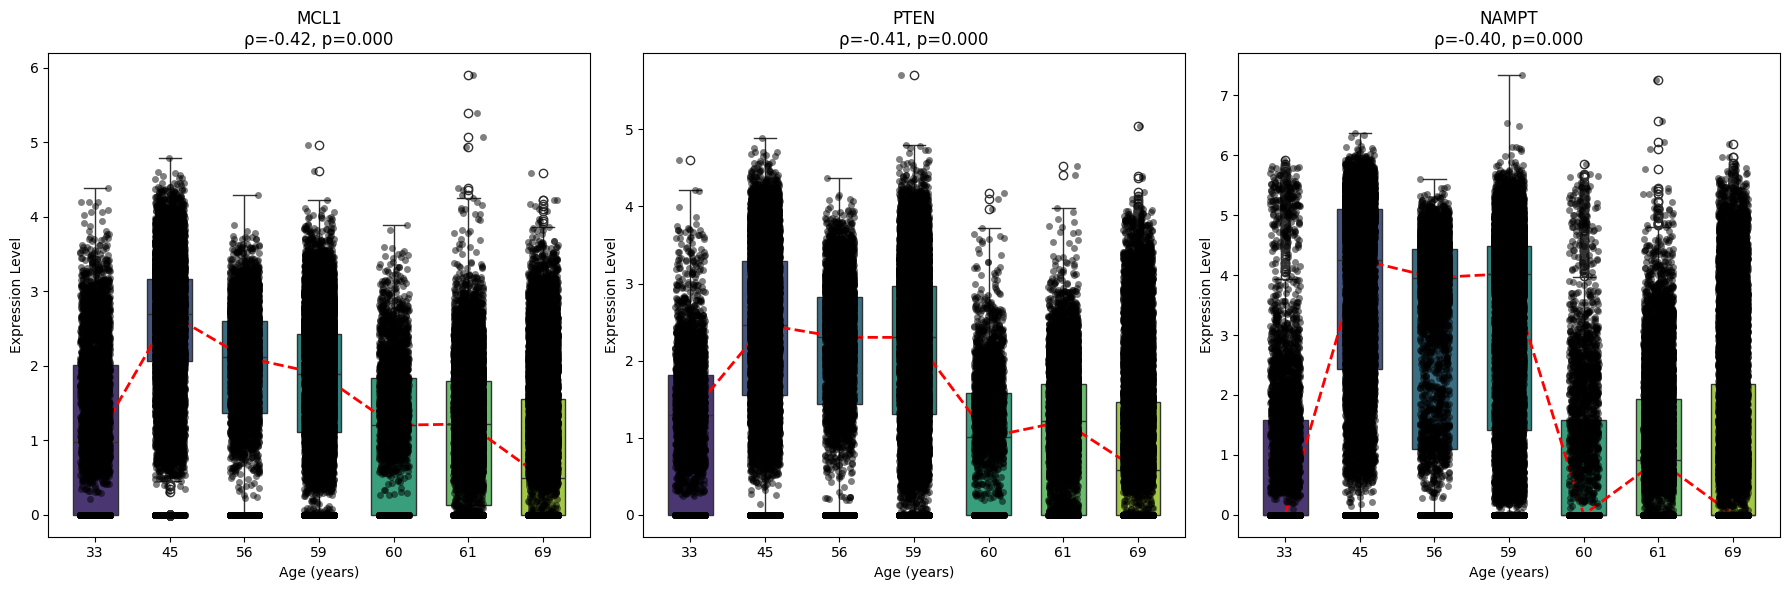

In [33]:
# 1. Выбор значимых генов
# Создаем копию DataFrame для безопасной работы
significant_genes = results_df[results_df['p_value'] < 0.05].copy()

# Добавляем столбец с абсолютным значением коэффициента Спирмена
significant_genes['abs_spearman'] = significant_genes['spearman_rho'].abs()

# Сортируем по абсолютному значению (по убыванию)
significant_genes = significant_genes.sort_values('abs_spearman', ascending=False)

# 2. Получаем уникальные возрасты и сортируем их
ages = sorted(blood_exp['age'].unique())
age_labels = [str(age) for age in ages]  # Создаем текстовые метки возрастов

# 3. Настройка графиков
plt.figure(figsize=(18, 6))

# 4. Построение боксплотов для топ-3 генов
for i, (_, row) in enumerate(significant_genes.head(3).iterrows()):
    gene = row['gene']
    
    if gene not in blood_exp.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    plt.subplot(1, 3, i+1)
    
    # Боксплот для каждого возраста
    sns.boxplot(x='age', y=gene, data=blood_exp, 
               palette='viridis', 
               order=ages,  # Важно: сохраняем порядок возрастов
               width=0.6)
    
    # Добавляем точки поверх
    sns.stripplot(x='age', y=gene, data=blood_exp,
                 color='black', alpha=0.5, jitter=0.2,
                 order=ages)
    
    # Добавляем линию тренда (соединяем медианы)
    medians = blood_exp.groupby('age')[gene].median()
    plt.plot(np.arange(len(ages)), medians[ages].values, 
            color='red', linestyle='--', linewidth=2)
    
    plt.title(f"{gene}\nρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}")
    plt.xlabel("Age (years)")
    plt.ylabel("Expression Level")
    plt.xticks(ticks=np.arange(len(ages)), labels=age_labels)  # Используем текстовые метки

plt.tight_layout()
plt.show()

/tmp/ipykernel_490120/258726211.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=blood_exp,
/tmp/ipykernel_490120/258726211.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=blood_exp,
/tmp/ipykernel_490120/258726211.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=blood_exp,


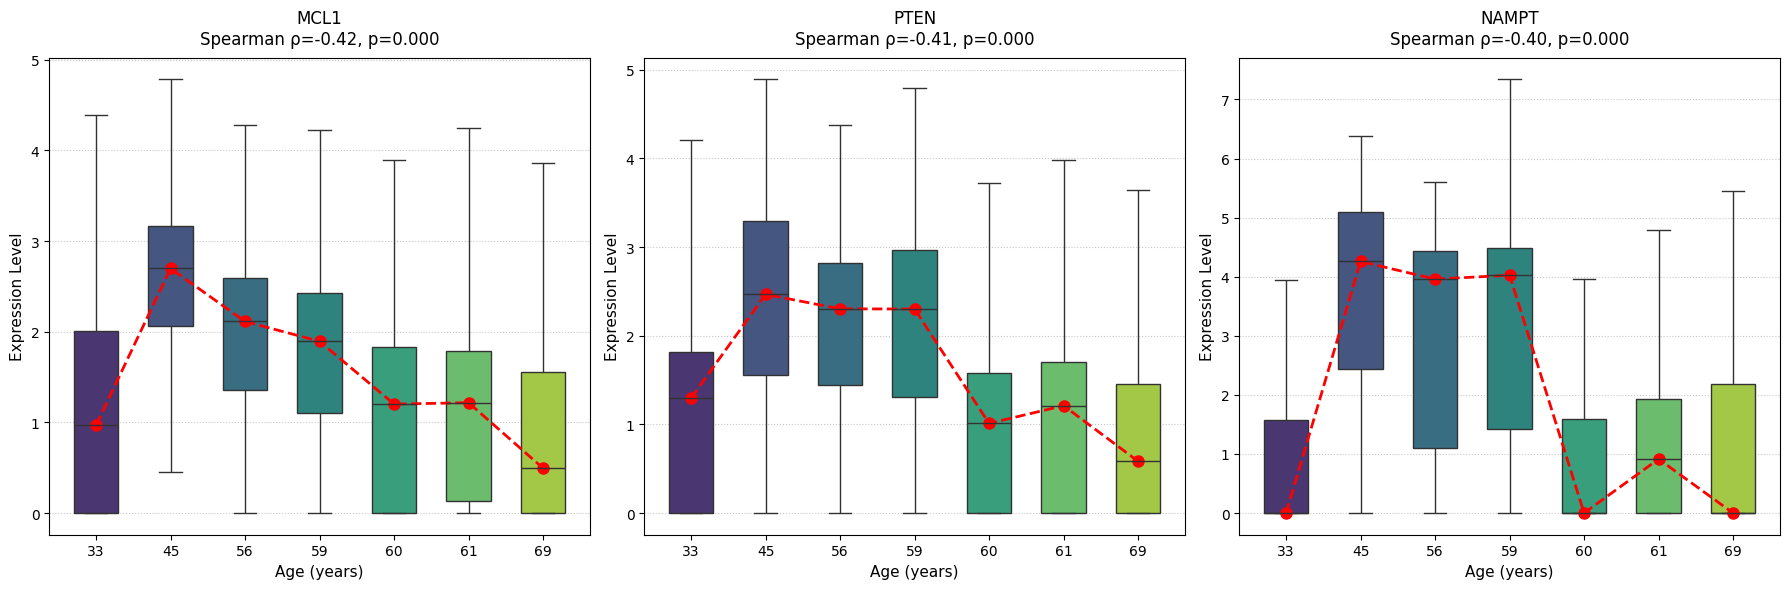

In [34]:
# 2. Получаем уникальные возрасты и сортируем их
ages = sorted(blood_exp['age'].unique())
age_labels = [str(age) for age in ages]

# 3. Настройка графиков
plt.figure(figsize=(18, 6))

# 4. Построение боксплотов для топ-3 генов
for i, (_, row) in enumerate(significant_genes.head(3).iterrows()):
    gene = row['gene']
    
    if gene not in blood_exp.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    plt.subplot(1, 3, i+1)
    
    # Только боксплоты без точек
    sns.boxplot(x='age', y=gene, data=blood_exp, 
               palette='viridis', 
               order=ages,
               width=0.6,
               showfliers=False)  # Отключаем выбросы
    
    # Линия тренда (медианы)
    medians = blood_exp.groupby('age')[gene].median()
    plt.plot(np.arange(len(ages)), medians[ages].values, 
            color='red', linestyle='--', linewidth=2,
            marker='o', markersize=8)  # Добавляем точки на линию
    
    plt.title(f"{gene}\nSpearman ρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}",
             fontsize=12, pad=10)
    plt.xlabel("Age (years)", fontsize=11)
    plt.ylabel("Expression Level", fontsize=11)
    plt.xticks(ticks=np.arange(len(ages)), labels=age_labels)
    
    # Добавляем сетку для лучшей читаемости
    plt.grid(axis='y', linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

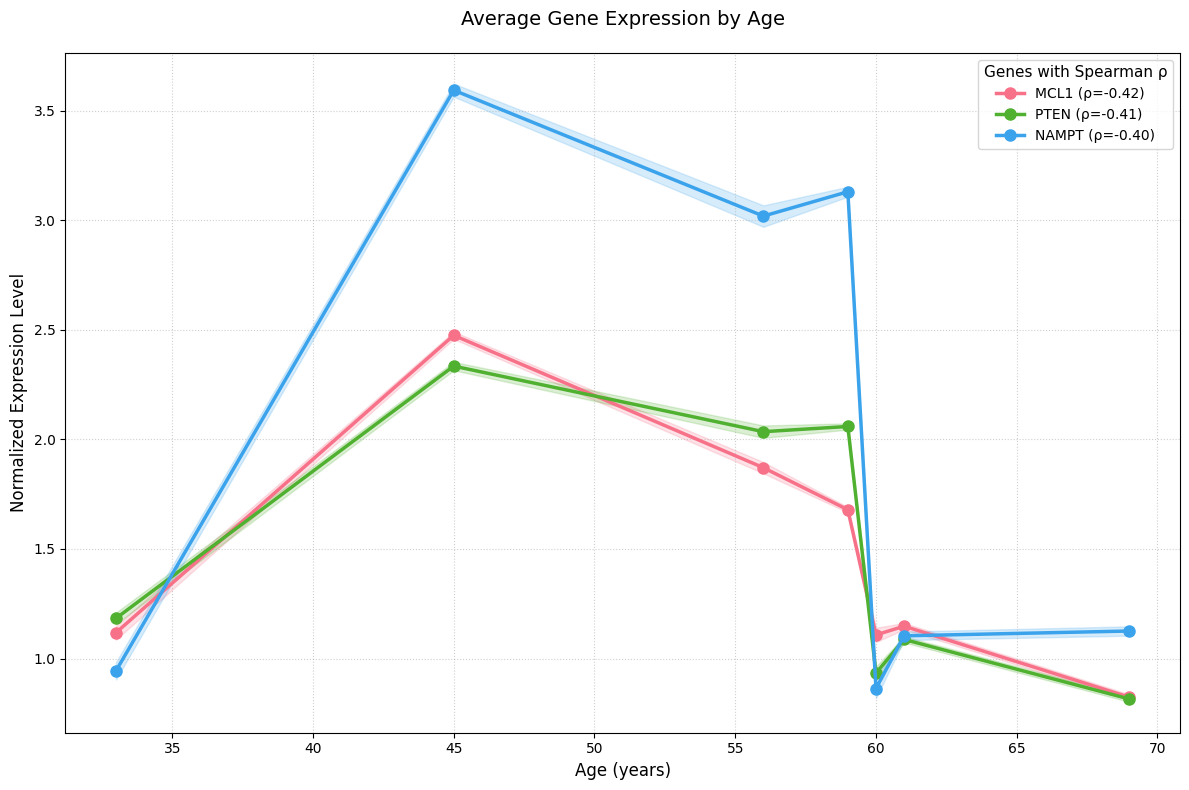

In [35]:
# 1. Подготовка данных
blood_exp['age'] = pd.to_numeric(blood_exp['age'])

# Выбор топ-3 значимых генов
top_genes = results_df[results_df['p_value'] < 0.05].sort_values('spearman_rho', ascending=False).head(3)['gene'].tolist()
# Добавляем столбец с абсолютным значением коэффициента Спирмена
significant_genes['abs_spearman'] = significant_genes['spearman_rho'].abs()

# Сортируем по абсолютному значению (по убыванию)
significant_genes = significant_genes.sort_values('abs_spearman', ascending=False)
top_genes = significant_genes.head(3)['gene'].tolist()
# 2. Вычисление статистик по возрастам
def calculate_stats(df, gene):
    stats = df.groupby('age')[gene].agg(['mean', 'std', 'count'])
    stats['ci'] = 1.96 * stats['std'] / np.sqrt(stats['count'])
    return stats

# 3. Создание спагетти-графика
plt.figure(figsize=(12, 8))
palette = sns.color_palette("husl", len(top_genes))

for i, gene in enumerate(top_genes):
    if gene not in blood_exp.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    # Рассчитываем статистики
    stats = calculate_stats(blood_exp, gene).reset_index()
    
    # Линия средних значений
    plt.plot(stats['age'], stats['mean'], 
             color=palette[i], 
             linewidth=2.5,
             marker='o',
             markersize=8,
             label=f"{gene} (ρ={results_df[results_df['gene'] == gene]['spearman_rho'].values[0]:.2f})")
    
    # Доверительные интервалы
    plt.fill_between(stats['age'], 
                    stats['mean'] - stats['ci'], 
                    stats['mean'] + stats['ci'],
                    color=palette[i], alpha=0.2)

# Настройки графика
plt.title("Average Gene Expression by Age", fontsize=14, pad=20)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Normalized Expression Level", fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title="Genes with Spearman ρ", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()

/tmp/ipykernel_3364075/290258969.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_3364075/290258969.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_3364075/290258969.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_3364075/290258969.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for 

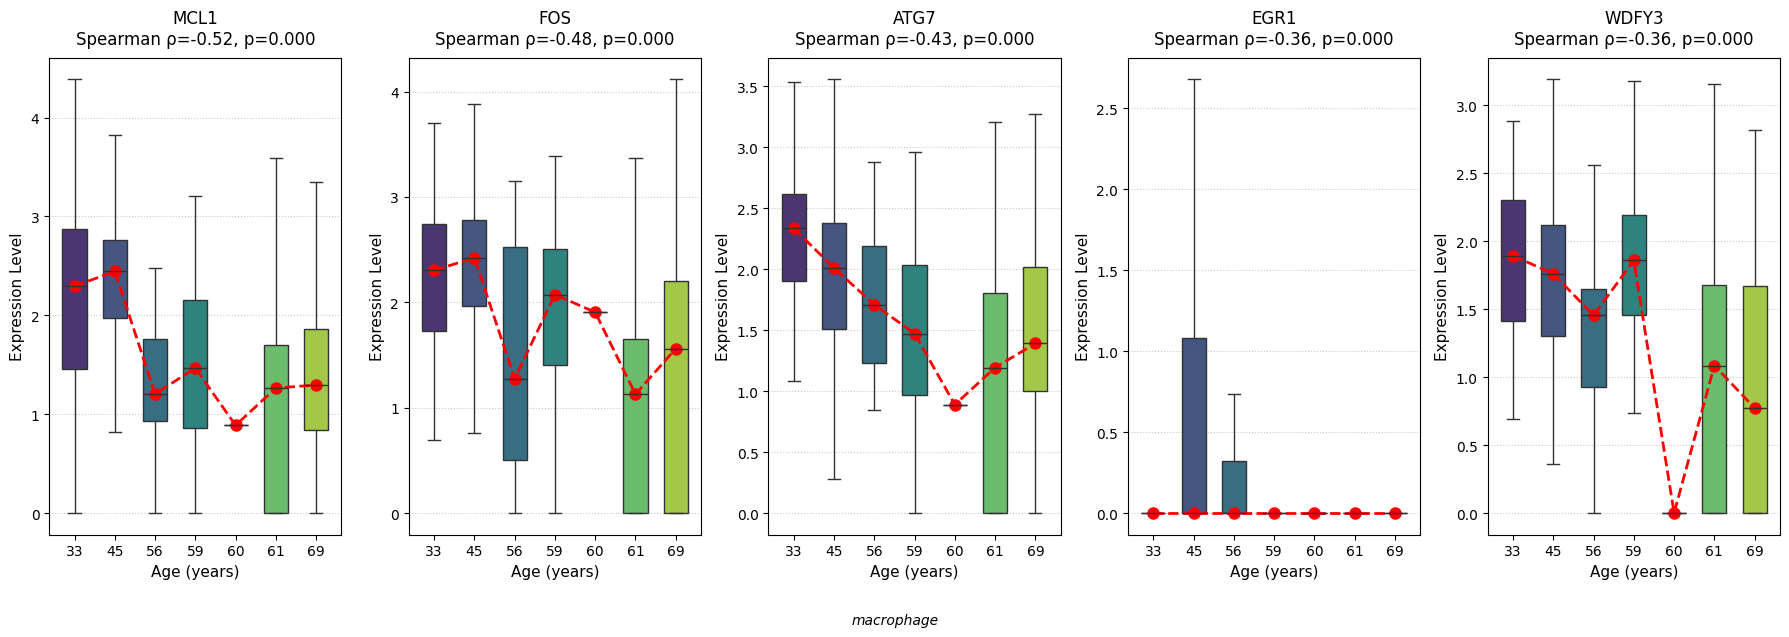

In [81]:
# 2. Получаем уникальные возрасты и сортируем их
ages = sorted(data['age'].unique())
age_labels = [str(age) for age in ages]

# 3. Настройка графиков
plt.figure(figsize=(18, 6))

# 4. Построение боксплотов для топ-3 генов
for i, (_, row) in enumerate(significant_genes_da.head(5).iterrows()):
    gene = row['gene']
    
    if gene not in data.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    plt.subplot(1, 5, i+1)
    
    # Только боксплоты без точек
    sns.boxplot(x='age', y=gene, data=data, 
               palette='viridis', 
               order=ages,
               width=0.6,
               showfliers=False)  # Отключаем выбросы
    
    # Линия тренда (медианы)
    medians = data.groupby('age')[gene].median()
    plt.plot(np.arange(len(ages)), medians[ages].values, 
            color='red', linestyle='--', linewidth=2,
            marker='o', markersize=8)  # Добавляем точки на линию
    
    plt.title(f"{gene}\nSpearman ρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}",
             fontsize=12, pad=10)
    plt.xlabel("Age (years)", fontsize=11)
    plt.ylabel("Expression Level", fontsize=11)
    plt.xticks(ticks=np.arange(len(ages)), labels=age_labels)
    
    # Добавляем сетку для лучшей читаемости
    plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.figtext(0.5, -0.05, 
           "macrophage",
           ha='center', fontsize=10, style='italic')
plt.tight_layout()
plt.show()

/home/tsymbalova/.venv/lib64/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


         gene  spearman_rho   p_value trend
0     LAMTOR1     -0.031784  0.306755  none
1     LAMTOR2      0.091760  0.003115    up
2     LAMTOR3     -0.014619  0.638351  none
3     LAMTOR4      0.043911  0.157852  none
4     LAMTOR5      0.034696  0.264535  none
..        ...           ...       ...   ...
771  TP53INP2     -0.048395  0.119537  none
772      TP63      0.031619  0.309280  none
773      TP73     -0.013452  0.665403  none
774     TUSC1      0.140379  0.000006    up
775     VEGFA     -0.110547  0.000364  down

[776 rows x 4 columns]


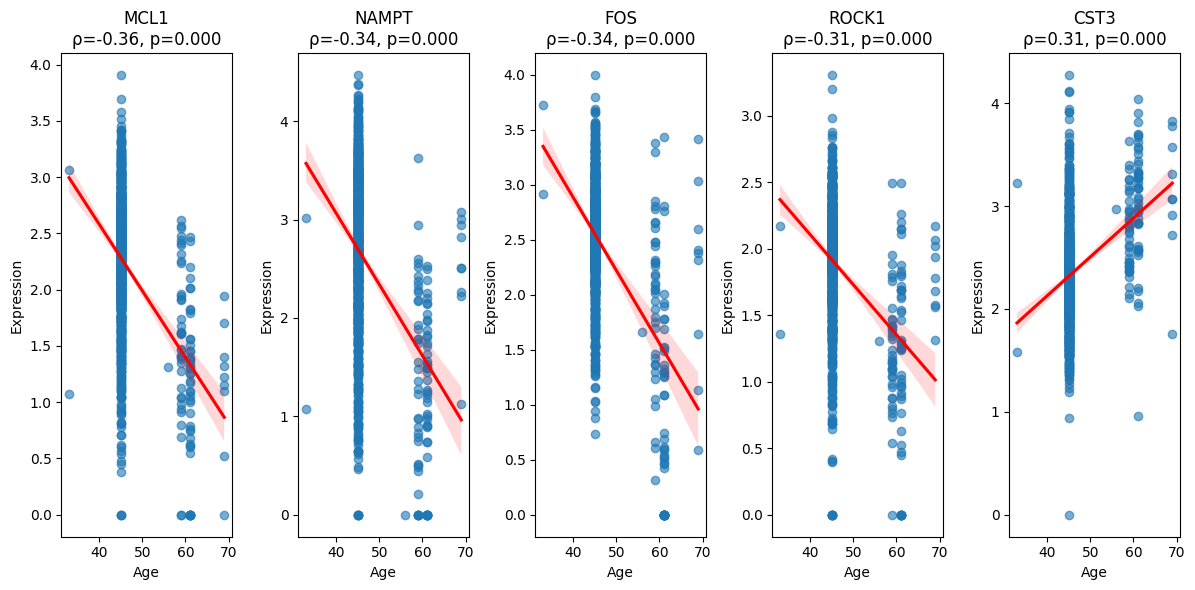

In [82]:
data = blood_exp[blood_exp["cell_type"] == "intermediate monocyte"]
results_da = []
for gene in autof["Gene"]:
    if gene not in data.columns:
        continue
    # Проверка на наличие достаточного количества точек
    if len(data[gene].dropna()) < 3:
        print(f"Пропущен {gene}: недостаточно данных")
        continue
    
    # Расчет коэффициента Спирмена и p-value
    rho, pval = spearmanr(data['age'], data[gene])
    
    # Определение типа тренда
    trend = "none"
    if pval < 0.05:
        trend = "up" if rho > 0 else "down"
    
    results_da.append({
        'gene': gene,
        'spearman_rho': rho,
        'p_value': pval,
        'trend': trend
    })
# Сохранение результатов в DataFrame
results_df_da = pd.DataFrame(results_da)
print(results_df_da)
# Создаем копию DataFrame для безопасной работы
significant_genes_da = results_df_da[results_df_da['p_value'] < 0.05].copy()

# Добавляем столбец с абсолютным значением коэффициента Спирмена
significant_genes_da['abs_spearman'] = significant_genes_da['spearman_rho'].abs()

# Сортируем по абсолютному значению (по убыванию)
significant_genes_da = significant_genes_da.sort_values('abs_spearman', ascending=False)
# Отрисовка графиков
plt.figure(figsize=(12, 6))
for i, (_, row) in enumerate(significant_genes_da.head(5).iterrows()):
    gene = row['gene']  # Получаем имя гена из строки DataFrame
    plt.subplot(1, 5, i+1)
    
    # Проверка, что ген есть в данных
    if gene not in data.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    sns.regplot(
        x=data['age'],  # Используем явно столбец 'age'
        y=data[gene],   # Используем столбец с именем гена
        scatter_kws={'alpha': 0.6}, 
        line_kws={'color': 'red'}
    )
    plt.title(f"{gene}\nρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}")
    plt.xlabel("Age")
    plt.ylabel("Expression")

plt.tight_layout()
plt.show()

/tmp/ipykernel_3364075/1140858716.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_3364075/1140858716.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_3364075/1140858716.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_3364075/1140858716.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

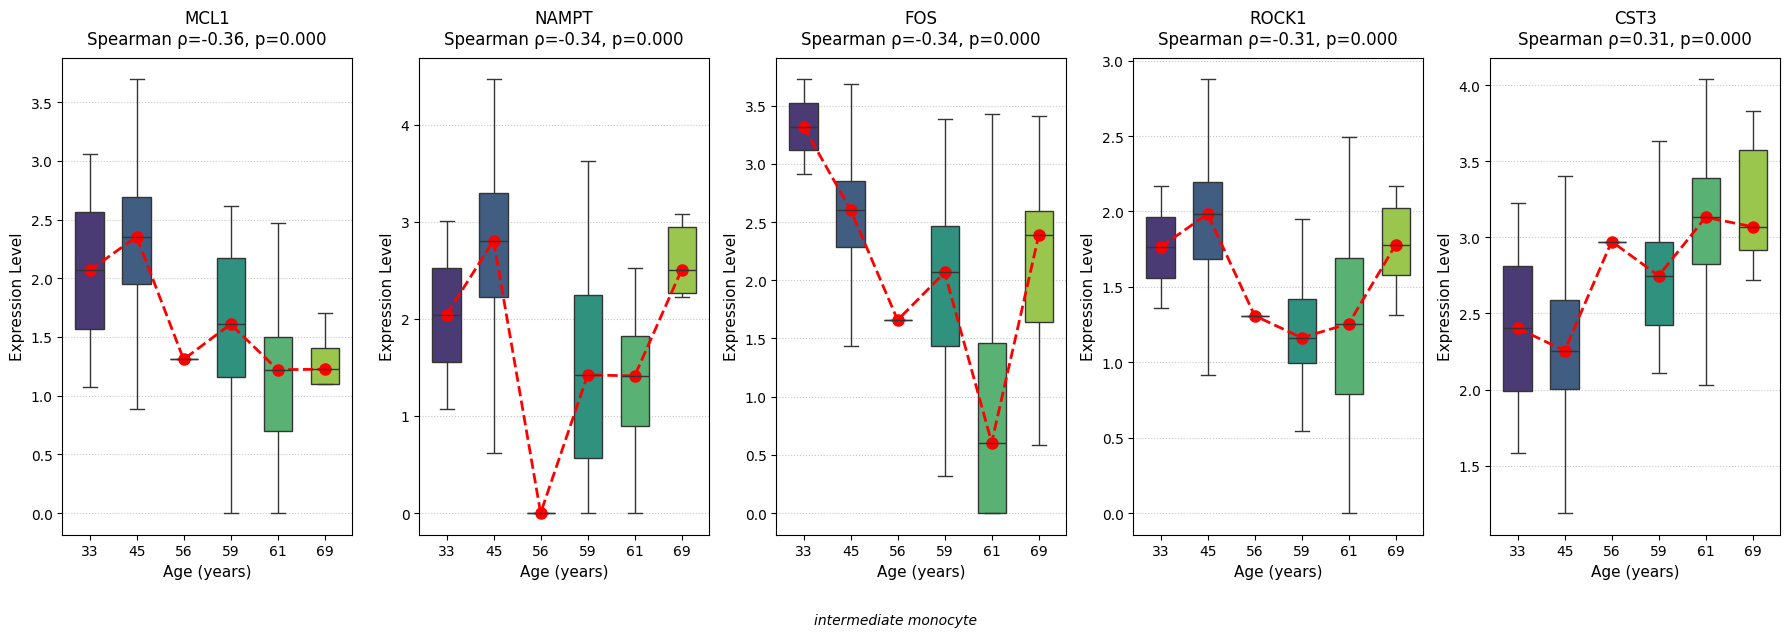

In [83]:
# 2. Получаем уникальные возрасты и сортируем их
ages = sorted(data['age'].unique())
age_labels = [str(age) for age in ages]

# 3. Настройка графиков
plt.figure(figsize=(18, 6))

# 4. Построение боксплотов для топ-3 генов
for i, (_, row) in enumerate(significant_genes_da.head(5).iterrows()):
    gene = row['gene']
    
    if gene not in data.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    plt.subplot(1, 5, i+1)
    
    # Только боксплоты без точек
    sns.boxplot(x='age', y=gene, data=data, 
               palette='viridis', 
               order=ages,
               width=0.6,
               showfliers=False)  # Отключаем выбросы
    
    # Линия тренда (медианы)
    medians = data.groupby('age')[gene].median()
    plt.plot(np.arange(len(ages)), medians[ages].values, 
            color='red', linestyle='--', linewidth=2,
            marker='o', markersize=8)  # Добавляем точки на линию
    
    plt.title(f"{gene}\nSpearman ρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}",
             fontsize=12, pad=10)
    plt.xlabel("Age (years)", fontsize=11)
    plt.ylabel("Expression Level", fontsize=11)
    plt.xticks(ticks=np.arange(len(ages)), labels=age_labels)
    
    # Добавляем сетку для лучшей читаемости
    plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.figtext(0.5, -0.05, 
           "intermediate monocyte",
           ha='center', fontsize=10, style='italic')
plt.tight_layout()
plt.show()

/home/tsymbalova/.venv/lib64/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


         gene  spearman_rho       p_value trend
0     LAMTOR1      0.122781  4.393410e-04    up
1     LAMTOR2      0.162625  3.019418e-06    up
2     LAMTOR3      0.144609  3.378303e-05    up
3     LAMTOR4      0.038561  2.712248e-01  none
4     LAMTOR5      0.065463  6.160241e-02  none
..        ...           ...           ...   ...
771  TP53INP2      0.147312  2.392662e-05    up
772      TP63      0.190911  3.890275e-08    up
773      TP73      0.227787  4.589559e-11    up
774     TUSC1           NaN           NaN  none
775     VEGFA      0.123332  4.137690e-04    up

[776 rows x 4 columns]


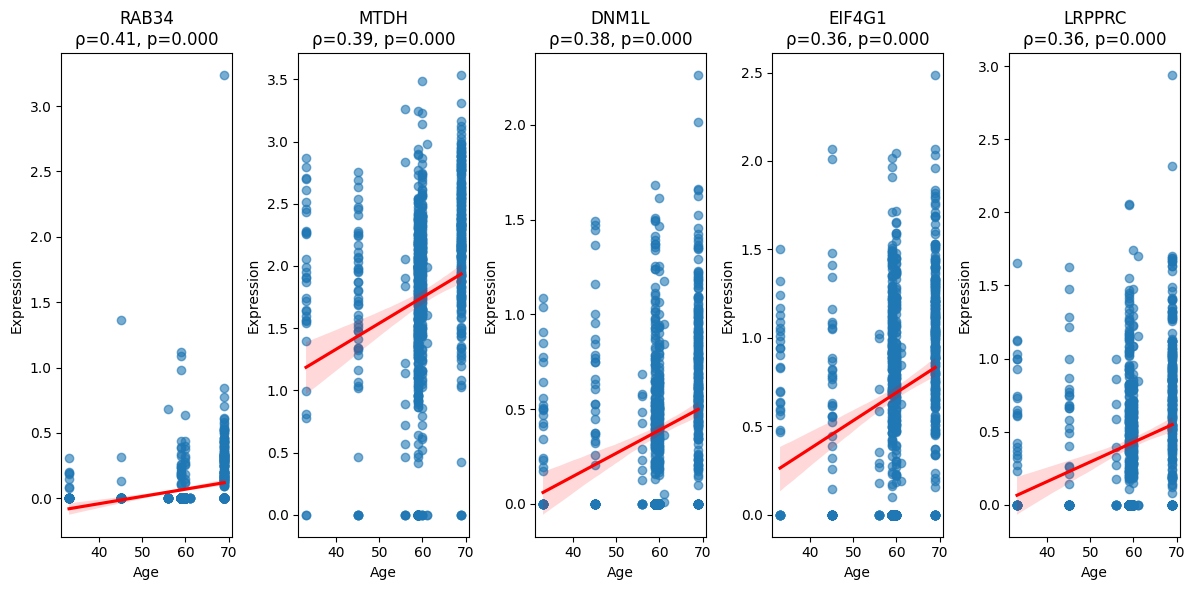

In [37]:
data = blood_exp[blood_exp["cell_type"] == "plasma cell"]
results_da = []
for gene in autof["Gene"]:
    if gene not in data.columns:
        continue
    # Проверка на наличие достаточного количества точек
    if len(data[gene].dropna()) < 3:
        print(f"Пропущен {gene}: недостаточно данных")
        continue
    
    # Расчет коэффициента Спирмена и p-value
    rho, pval = spearmanr(data['age'], data[gene])
    
    # Определение типа тренда
    trend = "none"
    if pval < 0.05:
        trend = "up" if rho > 0 else "down"
    
    results_da.append({
        'gene': gene,
        'spearman_rho': rho,
        'p_value': pval,
        'trend': trend
    })
# Сохранение результатов в DataFrame
results_df_da = pd.DataFrame(results_da)
print(results_df_da)
# Создаем копию DataFrame для безопасной работы
significant_genes_da = results_df_da[results_df_da['p_value'] < 0.05].copy()

# Добавляем столбец с абсолютным значением коэффициента Спирмена
significant_genes_da['abs_spearman'] = significant_genes_da['spearman_rho'].abs()

# Сортируем по абсолютному значению (по убыванию)
significant_genes_da = significant_genes_da.sort_values('abs_spearman', ascending=False)
# Отрисовка графиков
plt.figure(figsize=(12, 6))
for i, (_, row) in enumerate(significant_genes_da.head(5).iterrows()):
    gene = row['gene']  # Получаем имя гена из строки DataFrame
    plt.subplot(1, 5, i+1)
    
    # Проверка, что ген есть в данных
    if gene not in data.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    sns.regplot(
        x=data['age'],  # Используем явно столбец 'age'
        y=data[gene],   # Используем столбец с именем гена
        scatter_kws={'alpha': 0.6}, 
        line_kws={'color': 'red'}
    )
    plt.title(f"{gene}\nρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}")
    plt.xlabel("Age")
    plt.ylabel("Expression")

plt.tight_layout()
plt.show()

/tmp/ipykernel_490120/2719510087.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_490120/2719510087.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_490120/2719510087.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_490120/2719510087.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for 

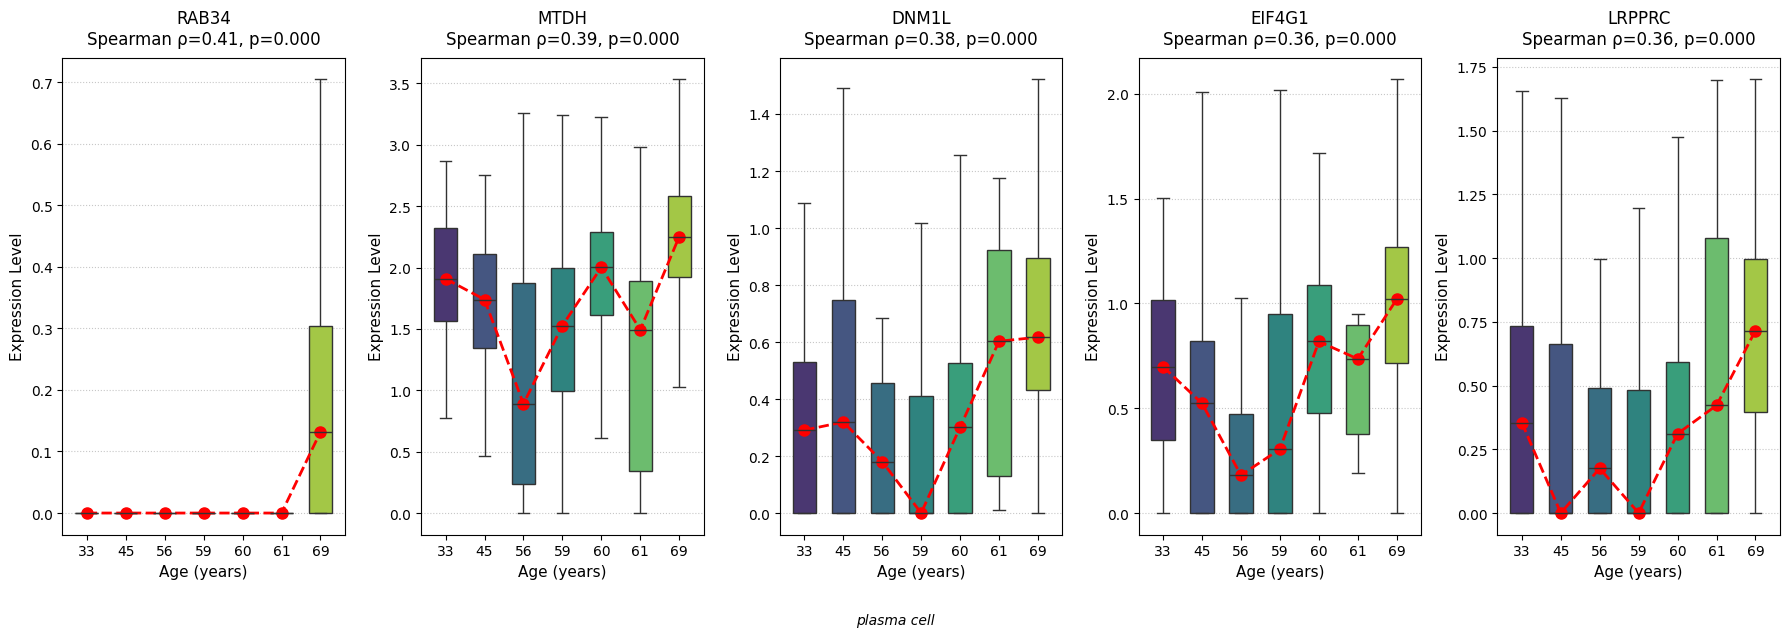

In [38]:
# 2. Получаем уникальные возрасты и сортируем их
ages = sorted(data['age'].unique())
age_labels = [str(age) for age in ages]

# 3. Настройка графиков
plt.figure(figsize=(18, 6))

# 4. Построение боксплотов для топ-3 генов
for i, (_, row) in enumerate(significant_genes_da.head(5).iterrows()):
    gene = row['gene']
    
    if gene not in data.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    plt.subplot(1, 5, i+1)
    
    # Только боксплоты без точек
    sns.boxplot(x='age', y=gene, data=data, 
               palette='viridis', 
               order=ages,
               width=0.6,
               showfliers=False)  # Отключаем выбросы
    
    # Линия тренда (медианы)
    medians = data.groupby('age')[gene].median()
    plt.plot(np.arange(len(ages)), medians[ages].values, 
            color='red', linestyle='--', linewidth=2,
            marker='o', markersize=8)  # Добавляем точки на линию
    
    plt.title(f"{gene}\nSpearman ρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}",
             fontsize=12, pad=10)
    plt.xlabel("Age (years)", fontsize=11)
    plt.ylabel("Expression Level", fontsize=11)
    plt.xticks(ticks=np.arange(len(ages)), labels=age_labels)
    
    # Добавляем сетку для лучшей читаемости
    plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.figtext(0.5, -0.05, 
           "plasma cell",
           ha='center', fontsize=10, style='italic')
plt.tight_layout()
plt.show()

/home/tsymbalova/.venv/lib64/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


         gene  spearman_rho   p_value trend
0     LAMTOR1     -0.039508  0.382846  none
1     LAMTOR2      0.079054  0.080428  none
2     LAMTOR3      0.050416  0.265340  none
3     LAMTOR4     -0.007266  0.872542  none
4     LAMTOR5      0.040996  0.365173  none
..        ...           ...       ...   ...
771  TP53INP2      0.001445  0.974547  none
772      TP63           NaN       NaN  none
773      TP73      0.038542  0.394598  none
774     TUSC1           NaN       NaN  none
775     VEGFA      0.020775  0.646419  none

[776 rows x 4 columns]


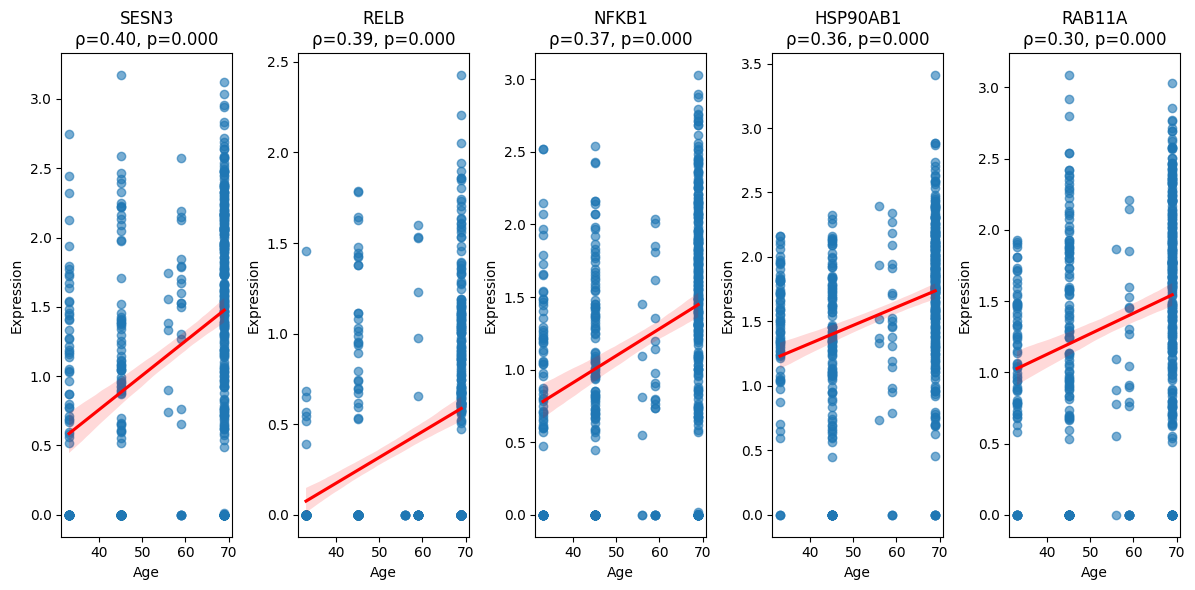

In [86]:
data = blood_exp[blood_exp["cell_type"] == "naive thymus-derived cd4-positive, alpha-beta t cell"]
results_da = []
for gene in autof["Gene"]:
    if gene not in data.columns:
        continue
    # Проверка на наличие достаточного количества точек
    if len(data[gene].dropna()) < 3:
        print(f"Пропущен {gene}: недостаточно данных")
        continue
    
    # Расчет коэффициента Спирмена и p-value
    rho, pval = spearmanr(data['age'], data[gene])
    
    # Определение типа тренда
    trend = "none"
    if pval < 0.05:
        trend = "up" if rho > 0 else "down"
    
    results_da.append({
        'gene': gene,
        'spearman_rho': rho,
        'p_value': pval,
        'trend': trend
    })
# Сохранение результатов в DataFrame
results_df_da = pd.DataFrame(results_da)
print(results_df_da)
# Создаем копию DataFrame для безопасной работы
significant_genes_da = results_df_da[results_df_da['p_value'] < 0.05].copy()

# Добавляем столбец с абсолютным значением коэффициента Спирмена
significant_genes_da['abs_spearman'] = significant_genes_da['spearman_rho'].abs()

# Сортируем по абсолютному значению (по убыванию)
significant_genes_da = significant_genes_da.sort_values('abs_spearman', ascending=False)
# Отрисовка графиков
plt.figure(figsize=(12, 6))
for i, (_, row) in enumerate(significant_genes_da.head(5).iterrows()):
    gene = row['gene']  # Получаем имя гена из строки DataFrame
    plt.subplot(1, 5, i+1)
    
    # Проверка, что ген есть в данных
    if gene not in data.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    sns.regplot(
        x=data['age'],  # Используем явно столбец 'age'
        y=data[gene],   # Используем столбец с именем гена
        scatter_kws={'alpha': 0.6}, 
        line_kws={'color': 'red'}
    )
    plt.title(f"{gene}\nρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}")
    plt.xlabel("Age")
    plt.ylabel("Expression")

plt.tight_layout()
plt.show()

/tmp/ipykernel_3364075/3874450881.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_3364075/3874450881.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_3364075/3874450881.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_3364075/3874450881.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

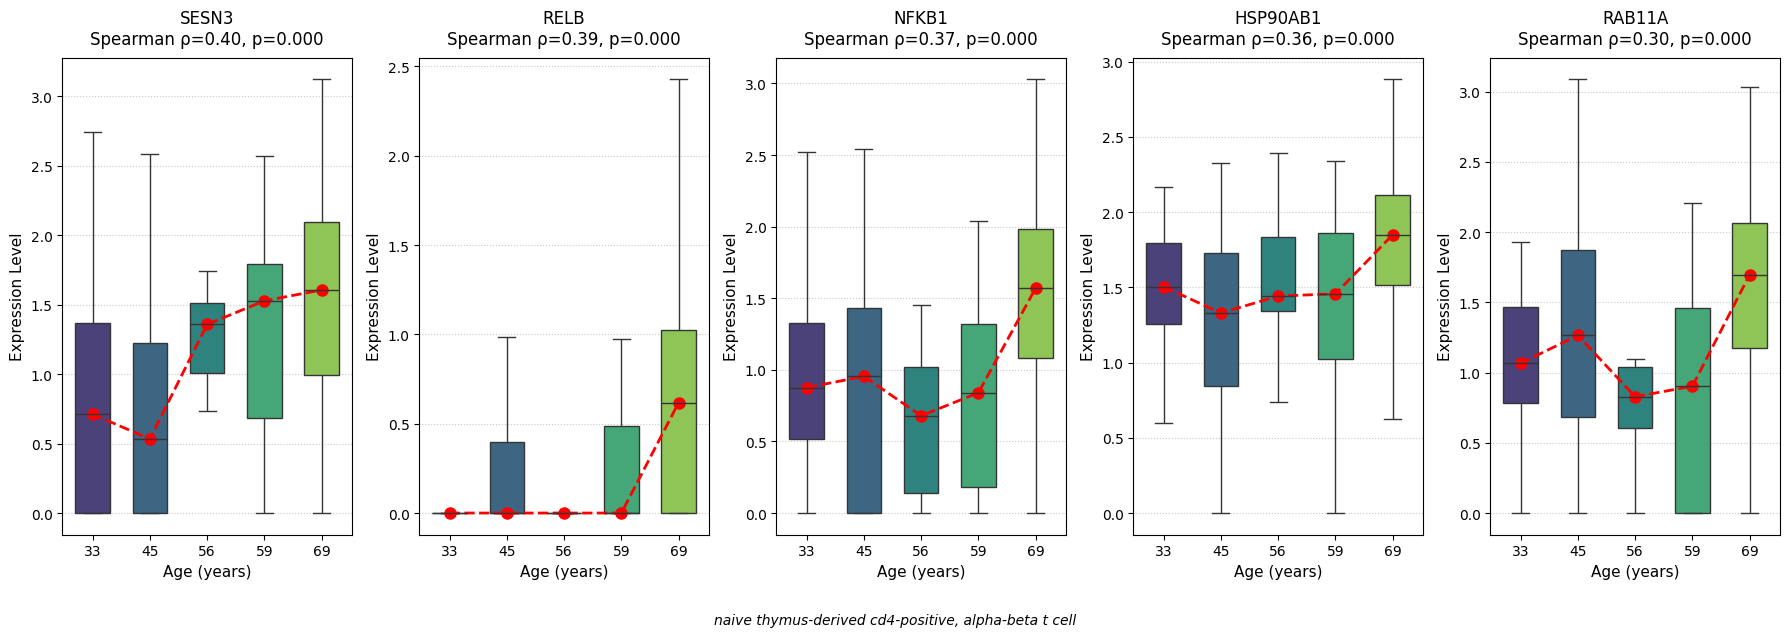

In [87]:
# 2. Получаем уникальные возрасты и сортируем их
ages = sorted(data['age'].unique())
age_labels = [str(age) for age in ages]

# 3. Настройка графиков
plt.figure(figsize=(18, 6))

# 4. Построение боксплотов для топ-3 генов
for i, (_, row) in enumerate(significant_genes_da.head(5).iterrows()):
    gene = row['gene']
    
    if gene not in data.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    plt.subplot(1, 5, i+1)
    
    # Только боксплоты без точек
    sns.boxplot(x='age', y=gene, data=data, 
               palette='viridis', 
               order=ages,
               width=0.6,
               showfliers=False)  # Отключаем выбросы
    
    # Линия тренда (медианы)
    medians = data.groupby('age')[gene].median()
    plt.plot(np.arange(len(ages)), medians[ages].values, 
            color='red', linestyle='--', linewidth=2,
            marker='o', markersize=8)  # Добавляем точки на линию
    
    plt.title(f"{gene}\nSpearman ρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}",
             fontsize=12, pad=10)
    plt.xlabel("Age (years)", fontsize=11)
    plt.ylabel("Expression Level", fontsize=11)
    plt.xticks(ticks=np.arange(len(ages)), labels=age_labels)
    
    # Добавляем сетку для лучшей читаемости
    plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.figtext(0.5, -0.05, 
           "naive thymus-derived cd4-positive, alpha-beta t cell",
           ha='center', fontsize=10, style='italic')
plt.tight_layout()
plt.show()

        gene  spearman_rho        p_value trend
0    LAMTOR1      0.021384   1.243621e-04    up
1    LAMTOR2      0.116548   9.197096e-98    up
2    LAMTOR3     -0.072612   6.691210e-39  down
3    LAMTOR4      0.128820  3.522277e-119    up
4    LAMTOR5      0.004397   4.301825e-01  none
..       ...           ...            ...   ...
56   ATP6V1H      0.004611   4.080303e-01  none
57  ATP6V0A2      0.006933   2.134904e-01  none
58  ATP6V1C1      0.019662   4.182867e-04    up
59   ATP6V1F      0.066514   6.657993e-33    up
60  ATP6V0D1     -0.131816  9.614248e-125  down

[61 rows x 4 columns]


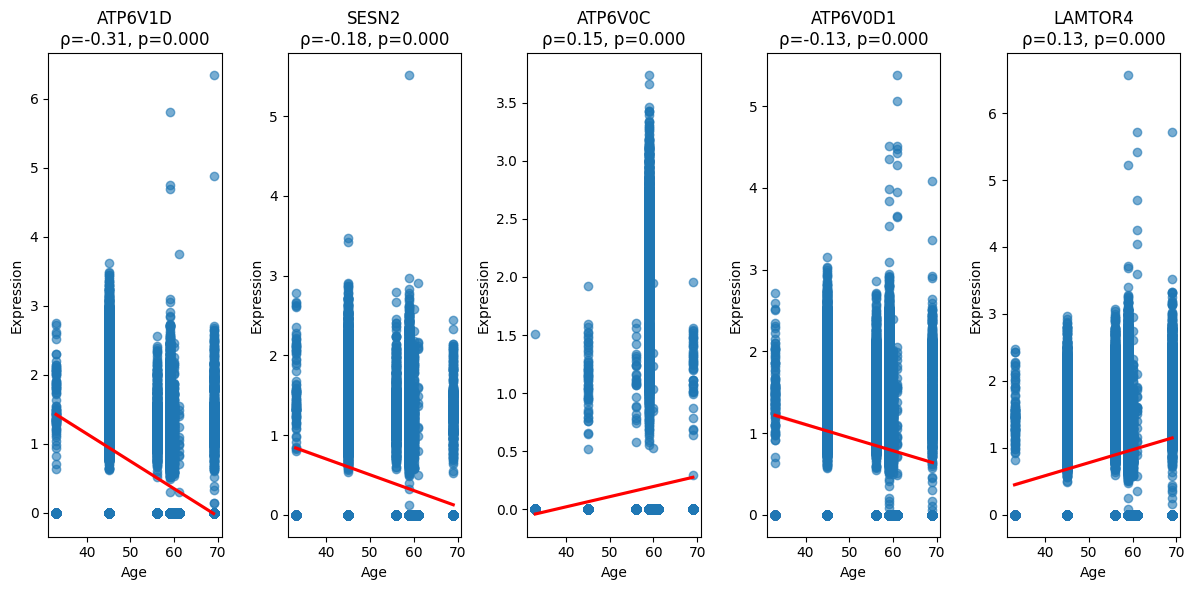

In [28]:
data = blood_exp[blood_exp["cell_type"] == "neutrophil"]
mTOR = autof[autof["Biological Function"] == "mTOR regulators"]
results_da = []
for gene in mTOR["Gene"]:
    if gene not in data.columns:
        continue
    # Проверка на наличие достаточного количества точек
    if len(data[gene].dropna()) < 3:
        print(f"Пропущен {gene}: недостаточно данных")
        continue
    
    # Расчет коэффициента Спирмена и p-value
    rho, pval = spearmanr(data['age'], data[gene])
    
    # Определение типа тренда
    trend = "none"
    if pval < 0.05:
        trend = "up" if rho > 0 else "down"
    
    results_da.append({
        'gene': gene,
        'spearman_rho': rho,
        'p_value': pval,
        'trend': trend
    })
# Сохранение результатов в DataFrame
results_df_da = pd.DataFrame(results_da)
print(results_df_da)
# Создаем копию DataFrame для безопасной работы
significant_genes_da = results_df_da[results_df_da['p_value'] < 0.05].copy()

# Добавляем столбец с абсолютным значением коэффициента Спирмена
significant_genes_da['abs_spearman'] = significant_genes_da['spearman_rho'].abs()

# Сортируем по абсолютному значению (по убыванию)
significant_genes_da = significant_genes_da.sort_values('abs_spearman', ascending=False)
# Отрисовка графиков
plt.figure(figsize=(12, 6))
for i, (_, row) in enumerate(significant_genes_da.head(5).iterrows()):
    gene = row['gene']  # Получаем имя гена из строки DataFrame
    plt.subplot(1, 5, i+1)
    
    # Проверка, что ген есть в данных
    if gene not in data.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    sns.regplot(
        x=data['age'],  # Используем явно столбец 'age'
        y=data[gene],   # Используем столбец с именем гена
        scatter_kws={'alpha': 0.6}, 
        line_kws={'color': 'red'}
    )
    plt.title(f"{gene}\nρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}")
    plt.xlabel("Age")
    plt.ylabel("Expression")

plt.tight_layout()
plt.show()

/tmp/ipykernel_3366526/3874450881.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_3366526/3874450881.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_3366526/3874450881.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y=gene, data=data,
/tmp/ipykernel_3366526/3874450881.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

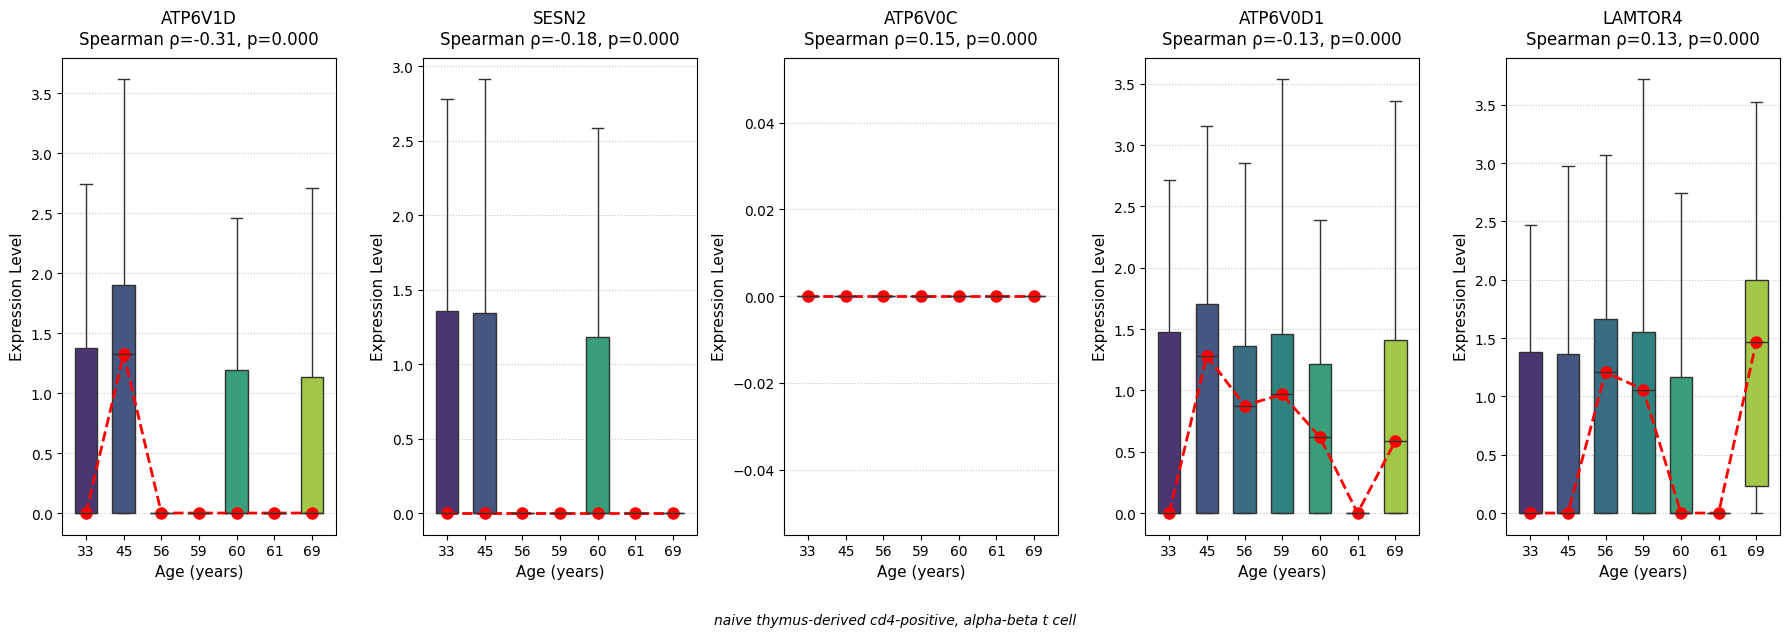

In [23]:
# 2. Получаем уникальные возрасты и сортируем их
ages = sorted(data['age'].unique())
age_labels = [str(age) for age in ages]

# 3. Настройка графиков
plt.figure(figsize=(18, 6))

# 4. Построение боксплотов для топ-3 генов
for i, (_, row) in enumerate(significant_genes_da.head(5).iterrows()):
    gene = row['gene']
    
    if gene not in data.columns:
        print(f"Пропущен {gene}: нет в данных")
        continue
    
    plt.subplot(1, 5, i+1)
    
    # Только боксплоты без точек
    sns.boxplot(x='age', y=gene, data=data, 
               palette='viridis', 
               order=ages,
               width=0.6,
               showfliers=False)  # Отключаем выбросы
    
    # Линия тренда (медианы)
    medians = data.groupby('age')[gene].median()
    plt.plot(np.arange(len(ages)), medians[ages].values, 
            color='red', linestyle='--', linewidth=2,
            marker='o', markersize=8)  # Добавляем точки на линию
    
    plt.title(f"{gene}\nSpearman ρ={row['spearman_rho']:.2f}, p={row['p_value']:.3f}",
             fontsize=12, pad=10)
    plt.xlabel("Age (years)", fontsize=11)
    plt.ylabel("Expression Level", fontsize=11)
    plt.xticks(ticks=np.arange(len(ages)), labels=age_labels)
    
    # Добавляем сетку для лучшей читаемости
    plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.figtext(0.5, -0.05, 
           "naive thymus-derived cd4-positive, alpha-beta t cell",
           ha='center', fontsize=10, style='italic')
plt.tight_layout()
plt.show()